<a href="https://colab.research.google.com/github/Leandro-Braga/Estudo_de_Caso/blob/main/S%C3%A9ries_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Séries de marketing

Nosso exemplo prático de análise de séries temporais de marketing será utilizado na série do índice de volume nominal de vendas no comércio varejista, entre 2000 e 2019, produzido pelo IBGE. Começaremos com o exemplo de vendas no comércio, índice que revela o volume nominal de vendas no comércio varejista brasileiro, obtida a partir da Pesquisa Mensal de Comércio (PMC), realizada pelo IBGE. Essa pesquisa serve como termômetro das vendas no Brasil, ferramenta essencial para definição da estratégia de marketing.

Segundo o IBGE, a Pesquisa Mensal de Comércio produz indicadores que permitem acompanhar o comportamento conjuntural do comércio varejista no país, investigando a receita bruta de revenda nas empresas formalmente constituídas, com 20 ou mais pessoas ocupadas, e cuja atividade principal é o comércio varejista. A pesquisa produz indicadores de faturamento real e nominal, pessoal ocupado, salários e outras remunerações, e é uma grande aliada na área de marketing.

 A série de marketing a ser estudada será o índice de volume e de receita nominal de vendas no comércio varejista com ajuste sazonal, definida como um conjunto de observações indexadas no tempo:

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

Em seguida, carregue o arquivo Excel, com as séries de marketing. 

In [33]:
df = pd.read_excel('sample_data/pmc.xlsx')
df.head()

,Month,Value
0,2000-01-01,49.5
1,2000-02-01,50.1
2,2000-03-01,50.3
3,2000-04-01,50.3
4,2000-05-01,50.7


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   240 non-null    datetime64[ns]
 1   Value   240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


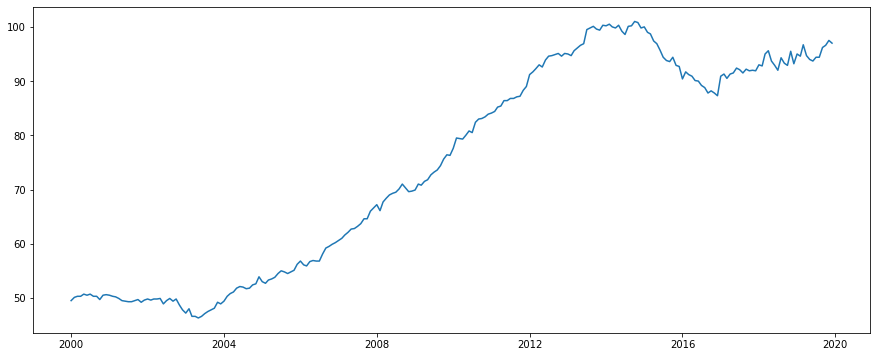

In [35]:
# plotar gráfico da Vendas no comércio mensal PMC-PF
plt.plot(df.Month, df.Value)

Antes de fazer a decomposição da série, temos que transformar a data em índice:

In [36]:
#Transformar da data em índice
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)

Para fazer a decomposição da série de acordo com o modelo aditivo:

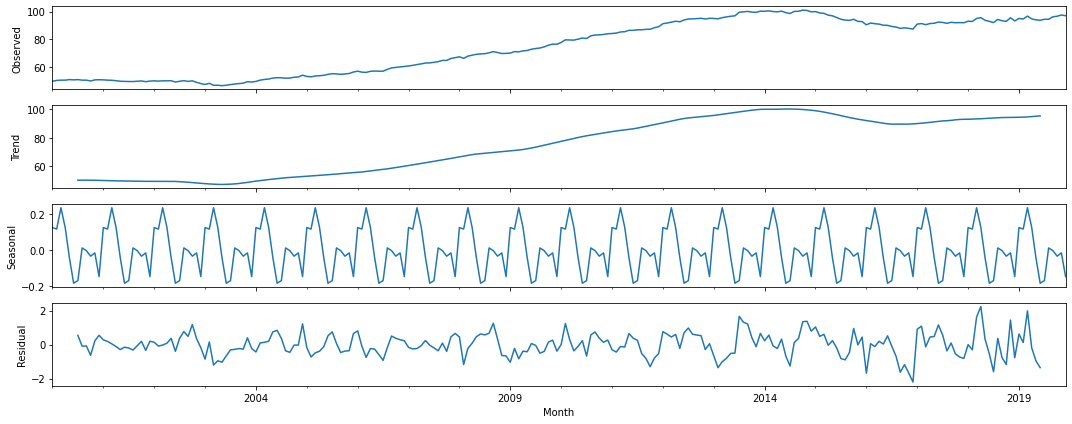

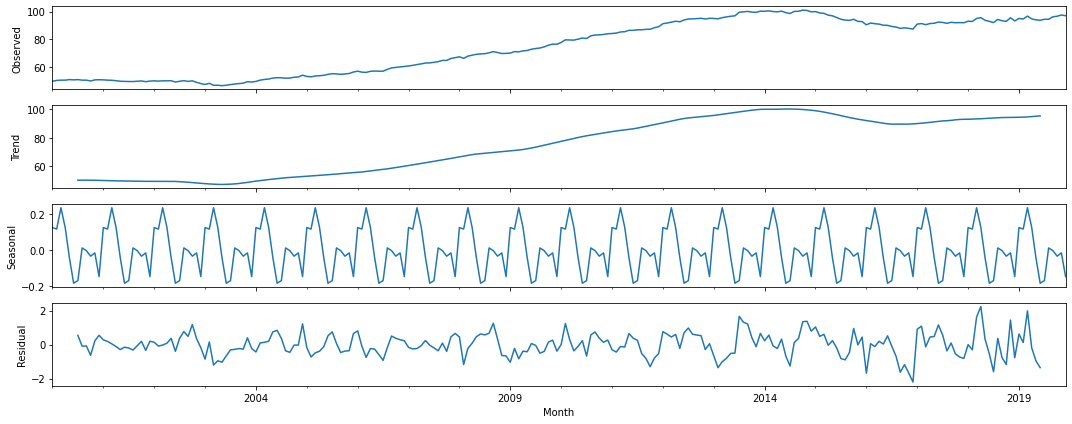

In [37]:
# salvar a decomposição no modelo aditivo
result = seasonal_decompose(df, model='additive')
result.plot()

Gráfico: Decomposição no modelo aditivo.

Voltando ao nosso exemplo, aplicaremos a decomposição multiplicativa à série:

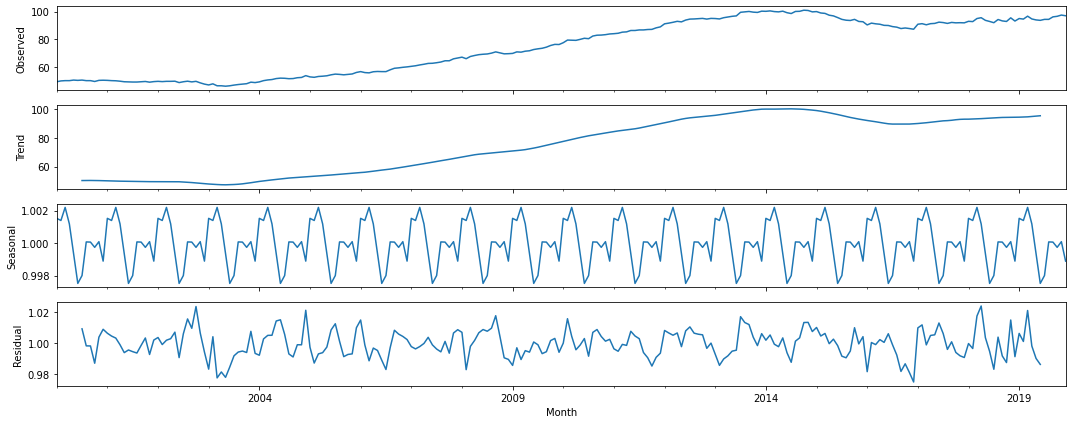

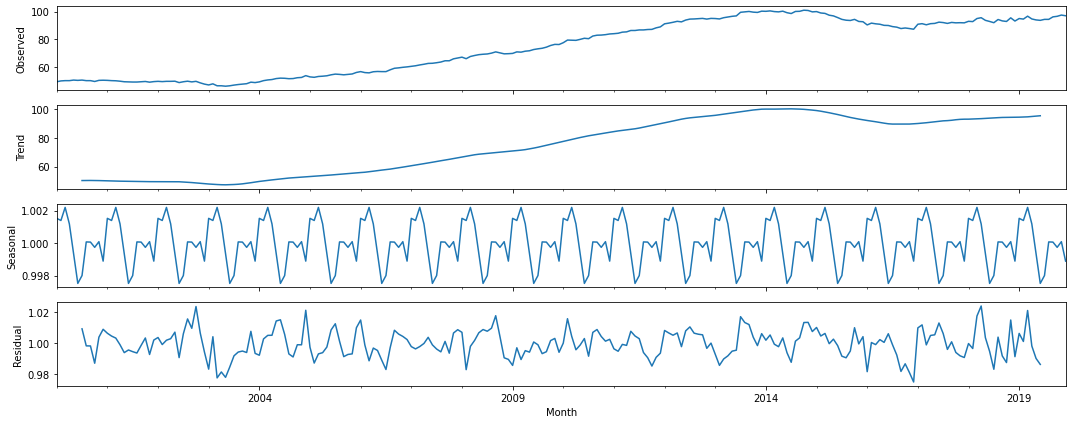

In [38]:
# decompõe a série de acordo com o modelo multiplicativo 
result = seasonal_decompose(df, model='multiplicative')
result.plot()

Gráfico: Decomposição da série de acordo com o modelo multiplicativo.

Observa-se um padrão muito similar entre os modelos de decomposição aditivo e multiplicativo, pois existe pouca ou nenhuma sazonalidade na série. A diferença entre os modelos é maior quando a sazonalidade depende da tendência.

### Modelos de suavização para séries de marketing

Considerando a média de K valores consecutivos, podemos tomar a média do último ano, ou seja, os últimos 12 valores. Vejamos o código Python para método da média móvel:

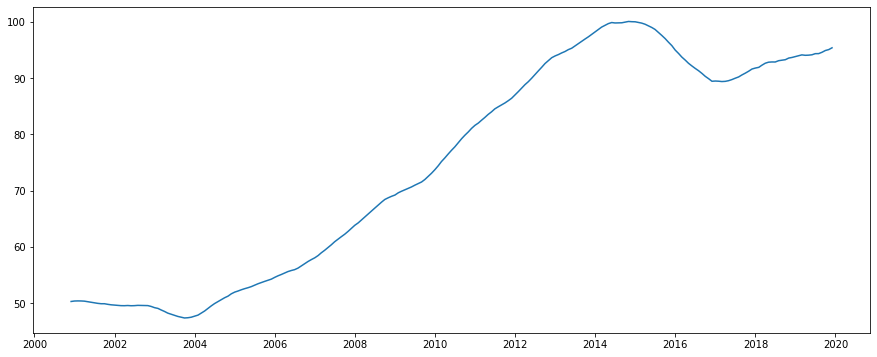

In [39]:
# Modelo de Médias Móveis com k=12
dados = df
mm = pd.DataFrame.rolling(dados,window=12,center=False).mean()
plt.plot(mm)

Gráfico: Modelo de Médias Móveis com k=12.

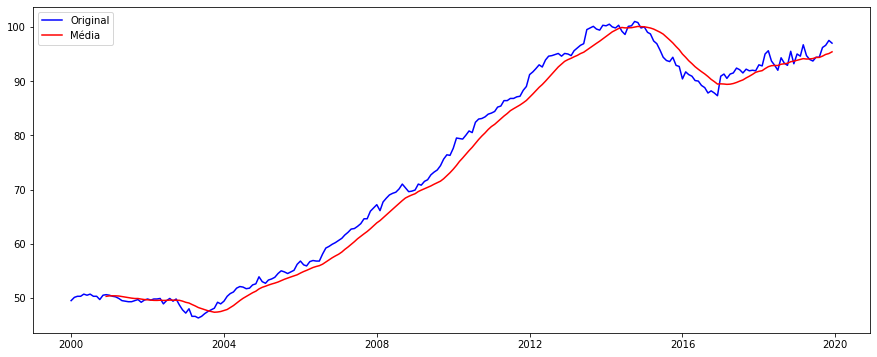

In [40]:
# Modelo de Médias Móveis comparado a série com k=12
mm = pd.DataFrame.rolling(dados,window=12,center=False).mean()
orig = plt.plot(dados, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

Gráfico: Modelo de Médias Móveis comparado a série com k=12.

Agora, vamos rodar o modelo de médias móveis para k=3:

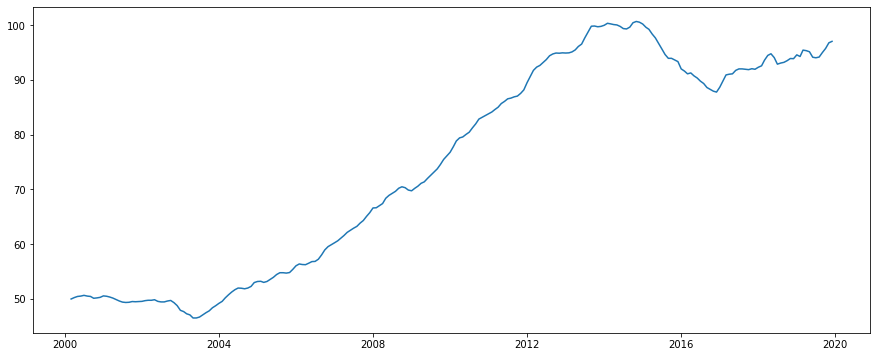

In [41]:
# Modelo de Médias Móveis com k=3
mm = pd.DataFrame.rolling(dados,window=3,center=False).mean()
plt.plot(mm)

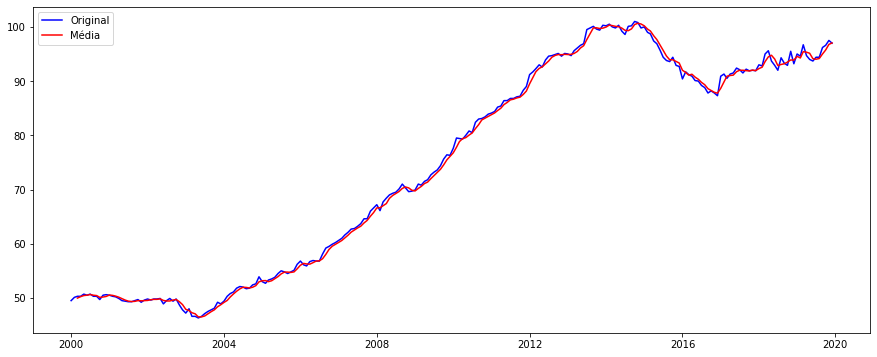

In [42]:
# Modelo de Médias Móveis comparado a série com k=3
mm = pd.DataFrame.rolling(dados,window=3,center=False).mean()
orig = plt.plot(dados, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

Gráfico: Modelo de Médias Móveis comparado a série com k=3.

A série das vendas no comércio tem a componente de tendência bem acentuado. Esse fato estilizado pode ser observado nos dois modelos de médias móveis. Os dois modelos suavizam a série de marketing, no entanto, comparando o modelo de médias móveis com k=12 e com k=3, observamos que no modelo com k=12 a suavização é maior, o que não ocorre com k=3.

In [43]:
# plotMovingAverage(dados, 3, plot_intervals=True)

In [44]:
def moving_average(series, n):
  '''
      Calcula a média da últimas n observações
  '''
  return np.average(series[-n:])

In [45]:
# Previsão 12 passos à frente
moving_average(dados, 12)

95.40000000000002

In [46]:
# Previsão 1 passos à frente
moving_average(dados, 1)

97.0

### Método Amortecimento exponencial para séries de marketing

Amortecimento exponencial (com constante de amortecimento = 0,8):

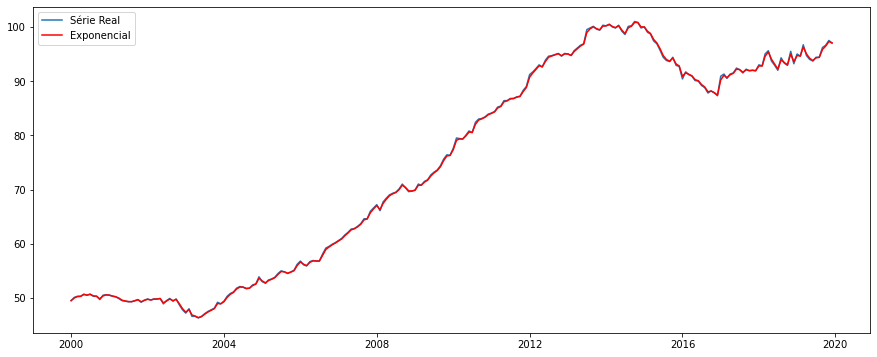

In [47]:
# Amortecimento Exponencial alfa = 0,8
rolling =  dados.ewm(alpha = 0.8)
rolling_mean = rolling.mean()
plt.plot(dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

Gráfico: Amortecimento Exponencial (alfa = 0,8).

A seguir, temos o código para amortecimento exponencial (com constante de amortecimento = 0,1):

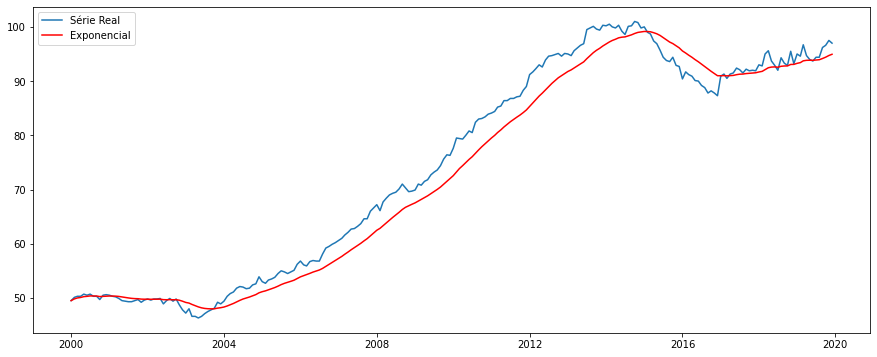

In [48]:
# Amortecimento Exponencial alfa = 0,1
rolling =  dados.ewm(alpha = 0.1)
rolling_mean = rolling.mean()
plt.plot(dados, label='Série Real')
plt.plot(rolling_mean,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

Gráfico: Amortecimento Exponencial alfa = 0,1.

Gráfico comparando-se mais de um valor da constante de amortecimento:

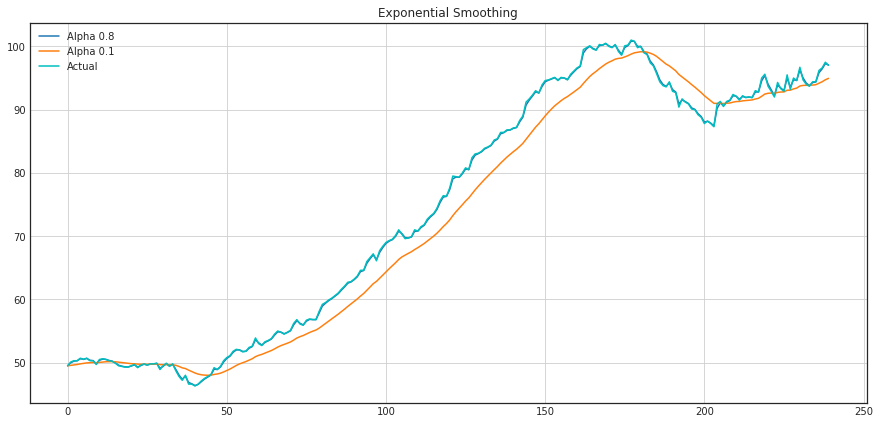

In [49]:
#Função para comparação com duas constantes de amortecimento:

def exponential_smoothing(series, alpha):
    '''
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    '''
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
    
def plotExponentialSmoothing(series, alphas):
    '''
        Plota suavização exponencial com diferentes alfas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    '''
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label='Alpha {}'.format(alpha))
        plt.plot(series.values,'c', label = 'Actual')
        plt.legend(loc='best')
        plt.axis('tight')
        plt.title('Exponential Smoothing')
        plt.grid(True);

plotExponentialSmoothing(dados.Value, [0.8, 0.1])

Gráfico: Comparação com duas constantes de amortecimento.

### Método de Holt Winters para séries de marketing

Primeiramente, rodaremos o modelo somente com o nível e o alfa de 0,1, que é igual ao amortecimento exponencial com o código Python para Método de Holt-Winters:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


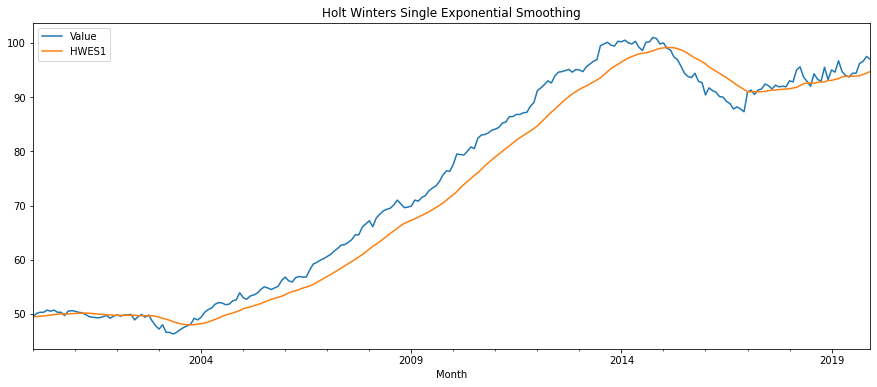

In [50]:
# holt winters (somente com o nível)
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Set the value of Alpha and define m (Time Period)
alpha = 0.1
df['HWES1'] = SimpleExpSmoothing(df['Value']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['Value','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

Modelo de Holt com a tendência e nível, para um modelo aditivo e multiplicativo:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


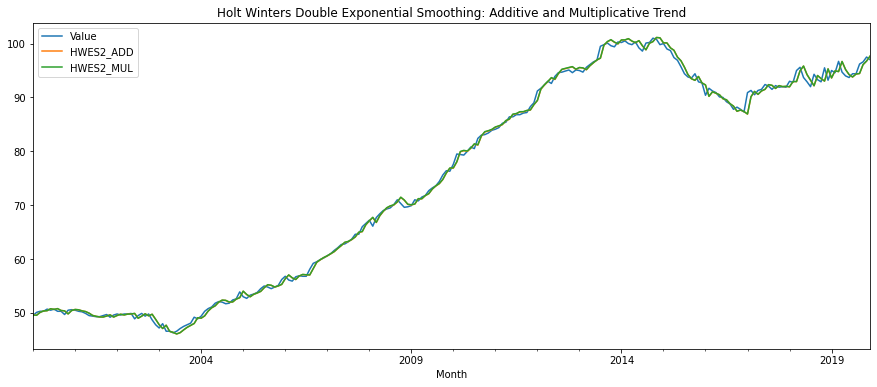

In [51]:
# holt winters (somente com a tendência aditiva e multiplicativa)
df['HWES2_ADD'] = ExponentialSmoothing(df['Value'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Value'],trend='mul').fit().fittedvalues
df[['Value','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

Também podemos rodar um código um pouco mais apurado que faz comparação com dois alfas e betas:

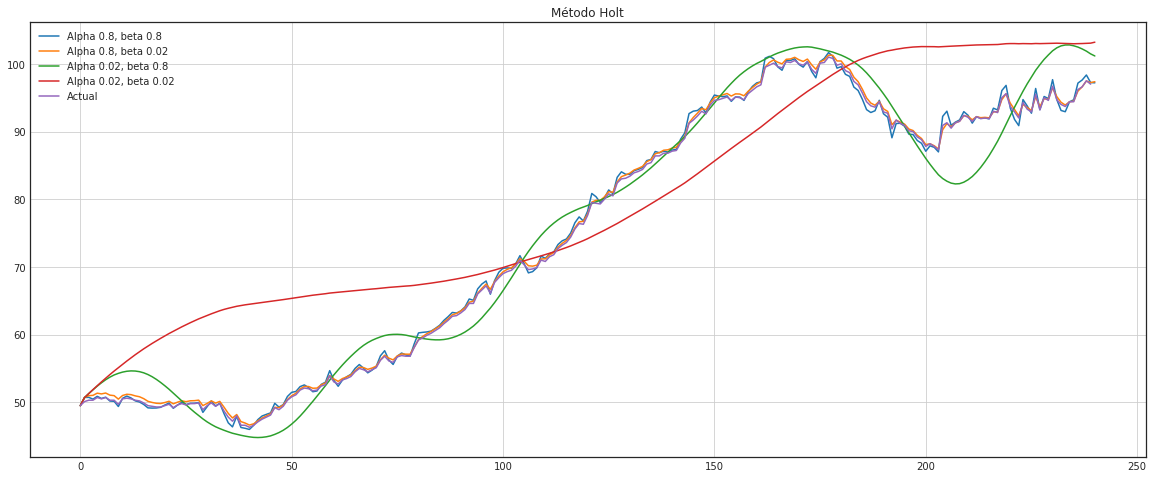

In [52]:
# Método de Holt
def metodo_holt(series, alpha, beta):
    '''
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    '''
    # o primeiro valor é o mesmo que a série
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # previsão
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotmetodo_holt(series, alphas, betas):
    '''
        Plota suavização exponencial dupla com diferentes alfas e betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    '''
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(metodo_holt(series, alpha, beta), label='Alpha {}, beta {}'.format(alpha, beta))
        plt.plot(series.values, label = 'Actual')
        plt.legend(loc='best')
        plt.axis('tight')
        plt.title('Método Holt')
        plt.grid(True)
        
plotmetodo_holt(dados.Value, alphas=[0.8, 0.02], betas=[0.8, 0.02])

Gráfico: Holt winters (comparação com dois alfas e betas).

Por último, temos o modelo de Holt-Winters somente com a tendência, para um modelo aditivo e multiplicativo:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


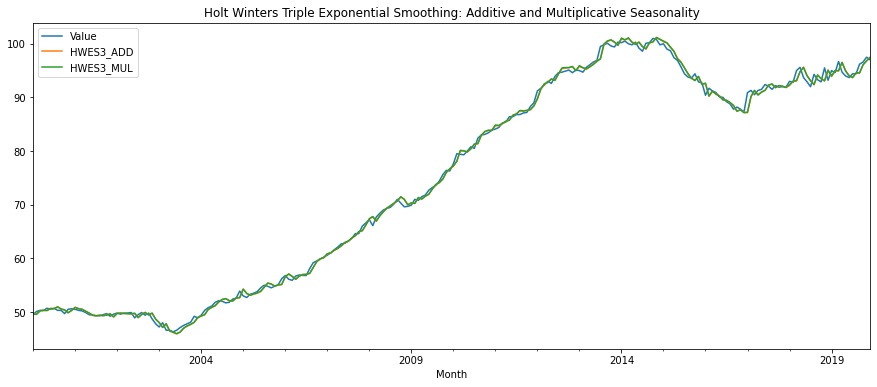

In [53]:
# holt winters (nível, tendência e sazonalidade, aditiva e multiplicativa)
df['HWES3_ADD'] = ExponentialSmoothing(df['Value'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['Value'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df[['Value','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

Gráfico: Holt winters (nível, tendência e sazonalidade, aditiva e multiplicativa).

Vamos fazer a previsão utilizando o modelo de Holt-Winters. Para isso, começaremos dividindo o conjunto de dados em treino e teste. Pegamos 168 dados como conjunto de treino e os últimos 12 últimos pontos de dados como conjunto de teste:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

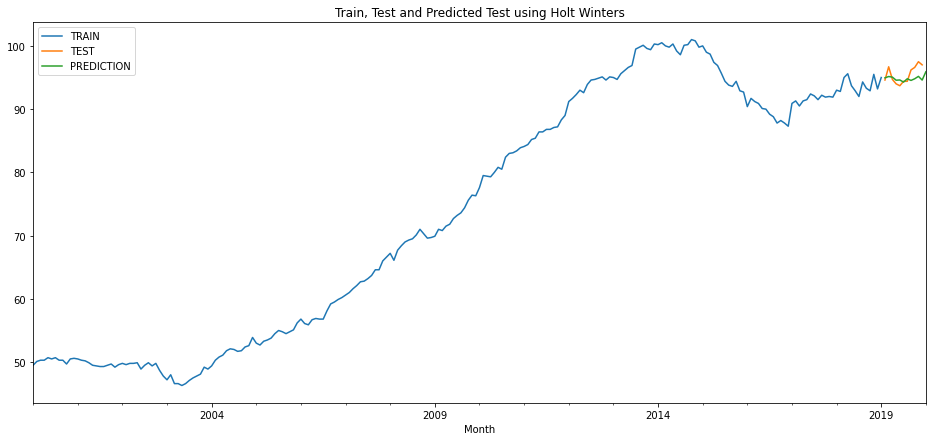

In [54]:
# Previsão 12 passos a frente com modelo de Holt-Winters
train_df = df [: 229]
test_df = df [229:]
fitted_model = ExponentialSmoothing(train_df['Value'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
train_df['Value'].plot(legend=True,label='TRAIN')
test_df['Value'].plot(legend=True,label='TEST',figsize=(16,7))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

Gráfico: Previsão 12 passos a frente com modelo de Holt-Winters .

Podemos observar que as previsões feitas com o modelo de Holt-Winters se ajustam bem, pois, comparando o período de teste com os valores previstos, vemos que existe o mesmo comportamento da série.

### Modelagem ARIMA para séries de marketing

A metodologia proposta por Box & Jenkins para a análise de uma série temporal consiste basicamente em quatro etapas sequenciais:

Primeiramente, precisamos verificar se a série é estacionária. No caso da série da PMC, vimos que a série não é estacionária, e podemos confirmar fazendo o gráfico da função de autocorrelação (FAC) e função de autocorrelação parcial (FAC).

In [56]:
df = pd.read_excel('sample_data/pmc.xlsx')
df.head()

,Month,Value
0,2000-01-01,49.5
1,2000-02-01,50.1
2,2000-03-01,50.3
3,2000-04-01,50.3
4,2000-05-01,50.7


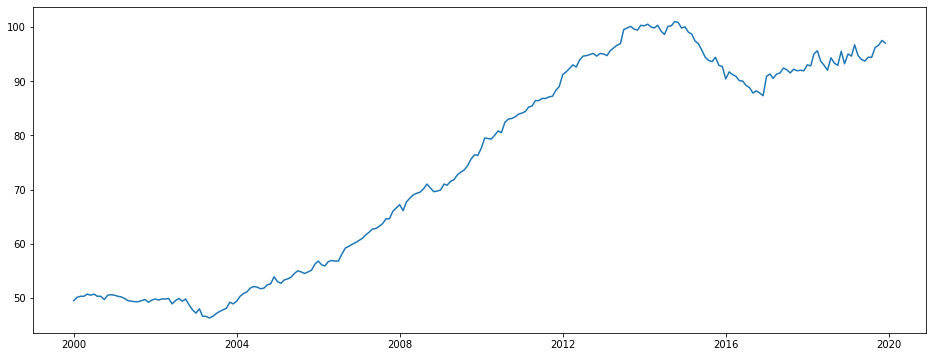

In [57]:
#Transformar da data em índice
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot(df)

In [58]:
# data como índice
df.head()

,Value
Month,
2000-01-01,49.5
2000-02-01,50.1
2000-03-01,50.3
2000-04-01,50.3
2000-05-01,50.7


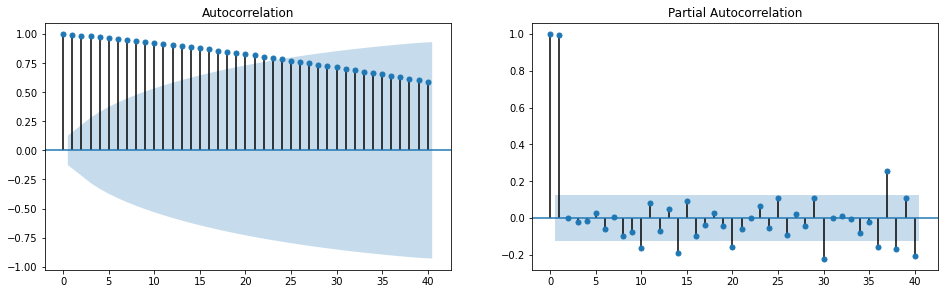

In [59]:
# Função de autocorrelação (FAC) e função de autocorrelação parcial (FAC)
def acf_pacf(x):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=ax2)
acf_pacf(df) 

Gráfico:Função de autocorrelação (FAC) e função de autocorrelação parcial (FAC).

Observa-se que a FAC decai lentamente, isso é um indício de que a série não é estacionária. Podemos transformar a série para fazer com que ela fique estacionárias, uma transformação seria fazer uma diferença para a série da PMC:

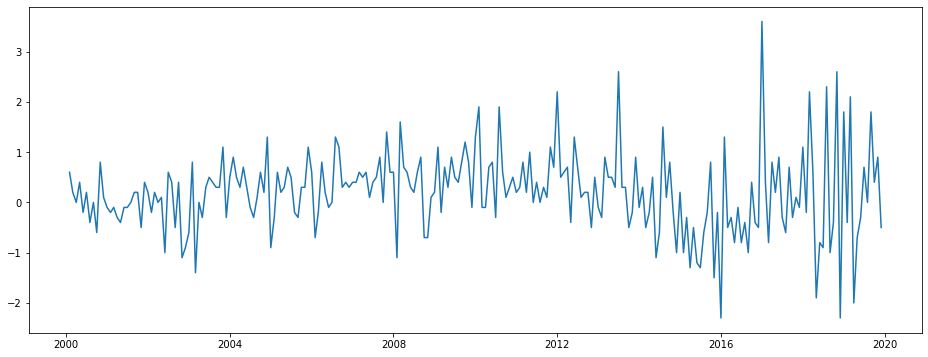

In [60]:
#Transformação para tornar a série estacionária
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.plot((df).diff().dropna());

Gráfico: Transformação para tornar a série estacionária.

A série transformada, após uma diferença, ou seja, foi identificado que o d=1 e aparentemente ficou estacionária; como a condição para estimar o modelo ARMA é que a séria seja estacionária, podemos seguir com a análise. A partir da série que se quer analisar, estima-se a FAC e obtém-se o gráfico da FAC e da FACP amostral.

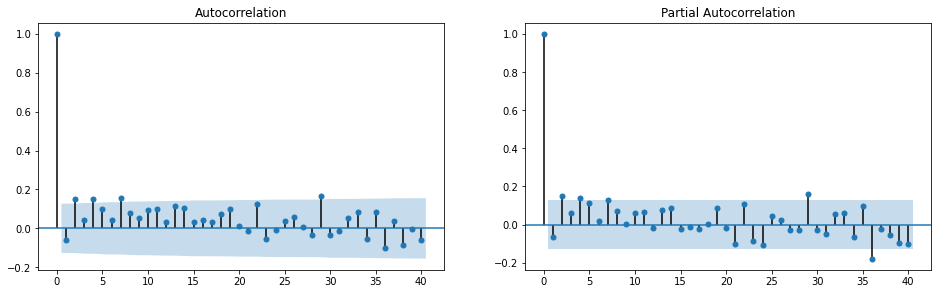

In [61]:
# FAC e FACP para série estacionária
acf_pacf((df).diff().dropna())

Gráfico: FAC e da FACP amostral.

Vamos fazer mais uma diferença, pois ainda ficaram alguns pontos fora do intervalo de confiança:

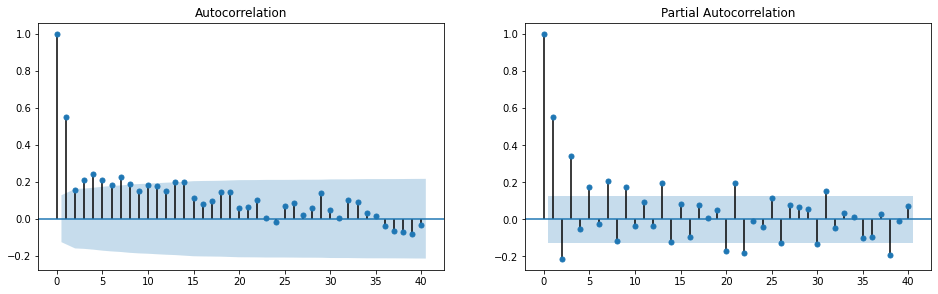

In [62]:
#FAC e FACP para série com duas diferenças
acf_pacf((df).diff(2).dropna())

Gráfico: FAC e FACP para série com duas diferenças.

Observamos que após a segunda diferença, a série apresenta um comportamento mais fácil de identificar. A FAC de um é truncada em q=1, que é característica de um modelo de médias móveis de ordem 1 MA(1). A FACP decai exponencialmente. Dessa maneira, o procedimento sugerido por Box & Jenkins para a identificação das ordens p e q de um modelo de séries temporais é: p=0 e q=1. Como foi necessário fazer duas diferenças para tornar a série estacionária, d=2, o modelo a ser sugerido é o ARIMA(0,2,1), finalizando a primeira identificação.

In [63]:
# Ajuste do modelo ARIMA(0,2,1)
model = sm.tsa.ARMA(1000 * ((df).diff(2).dropna()), (0,1)).fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                  238
Model:                     ARMA(0, 1)   Log Likelihood               -1933.385
Method:                       css-mle   S.D. of innovations            811.151
Date:                Sun, 23 Jan 2022   AIC                           3872.770
Time:                        20:33:50   BIC                           3883.187
Sample:                    03-01-2000   HQIC                          3876.968
                         - 12-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         398.8462    103.490      3.854      0.000     196.010     601.683
ma.L1.Value     0.9719      0.062     15.608      0.000       0.850       1.094
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Uma vez identificado e estimado um modelo, devemos diagnosticar o modelo, verificar se os resíduos apresentam as propriedades esperadas para eles, ou seja, se eles se comportam como um ruído branco. 

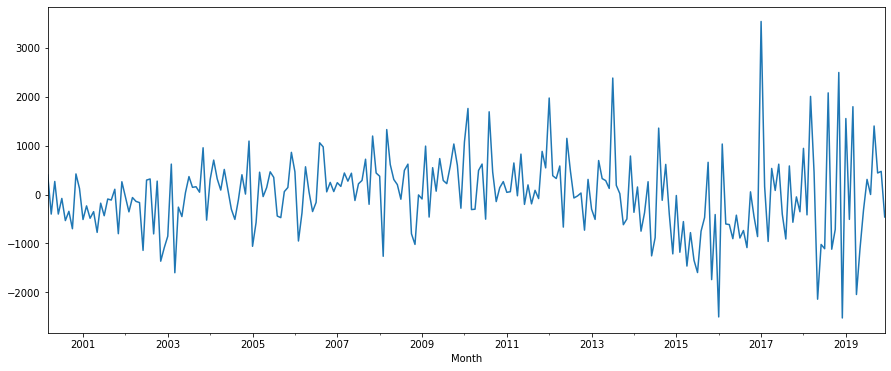

In [64]:
# Gráfico dos resíduos
model.resid.plot()

Gráfico: Resíduos.

Os resíduos são estacionários, possuem a média zero; agora, vamos fazer a FAC e FACP para verificar autocorrelação dos resíduos:

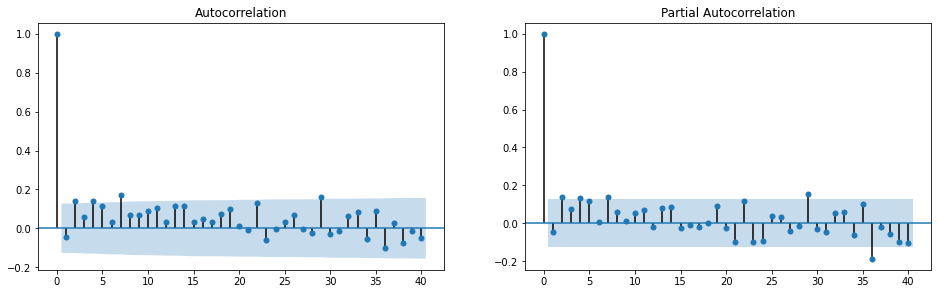

In [65]:
# FAC e FACP dos resíduos
acf_pacf(model.resid)

Gráfico: FAC e FACP dos resíduos.

Podemos observar que não há indícios de autocorrelação dos resíduos, as FAC e FACP estão dentro do intervalo de confiança. Assim, a série temporal de marketing dos índices de volume e de receita nominal de vendas no comércio varejista (base 2014 = 100) com ajuste sazonal, entre 2000 até 2019.